# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

Составим первое представление о данных:

In [1]:
#импортируем библиотеку Pandas для работы с данными
import pandas as pd
# и библиотеку matplotlib.pyplot для красивого вывода графиков
import matplotlib.pyplot as plt
# на всякий случай использую ещё одну библиотеку с графиками
import seaborn as sns

In [2]:
# в переменную data положим данные из real_estate_data
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# посмотрим первые 5 строк Датафрейма
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
# посмотрим числовое описание данных
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Есть экстремумы, которые в дальнейнем стоит рассмотреть, например, квартиры с высотой потолков в 100 м явно не выглядят правдоподобно.

In [4]:
# с помощью метода info() получаем общую информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Количество значений в столбцах разное, значит присутствуют пропуски.**

Для дальнейшего облегчения воспиятия данных составим таблицу на основе полученных данных и документации к данным, также были добавлены первичные явные ошибки, которые будут исправлены в [Предобработкe данных](#Предобработка-данных).

#### Таблица данных

Название | Тип данных | Описание | Первичные предложение по изменениям
--- | --- | --- | ---
total_images | int64 | число фотографий квартиры в объявлении 
last_price | float64 | цена на момент снятия с публикации | для удобства восприятия можно сразу перевести в миллионы
total_area | float64 | общая площадь квартиры в квадратных метрах (м²)
first_day_exposition | object | дата публикации | преобразовать данные в формат дат (datetime64)
rooms | int64 | число комнат
ceiling_height | float64 | высота потолков (м)
floors_total | float64 | всего этажей в доме | изменить формат данных на целое число int64
living_area | float64 | жилая площадь в квадратных метрах (м²)
floor | int64 | этаж   
is_apartment | object | апартаменты (булев тип) | стоит избавиться от пропусков, чтобы привести всё к типу bool
studio | bool | квартира-студия (булев тип)   
open_plan | bool | свободная планировка (булев тип)
kitchen_area | float64 | площадь кухни в квадратных метрах (м²)
balcony | float64 | число балконов | изменить формат данных на целое число int64
locality_name | object | название населённого пункта 
airports_nearest | float64 | расстояние до ближайшего аэропорта в метрах (м)
cityCenters_nearest | float64 | расстояние до центра города (м) | можно полностью перевести название переменной в змеиный регистр
parks_around3000 | float64 | число парков в радиусе 3 км | изменить формат данных на целое число int64
parks_nearest | float64 | расстояние до ближайшего парка (м)
ponds_around3000 | float64 | число водоёмов в радиусе 3 км | изменить формат данных на целое число int64
ponds_nearest | float64 | расстояние до ближайшего водоёма (м)
days_exposition | float64 | сколько дней было размещено объявление (от публикации до снятия) | изменить формат данных на целое число int64


Теперь построим гистограммы:

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

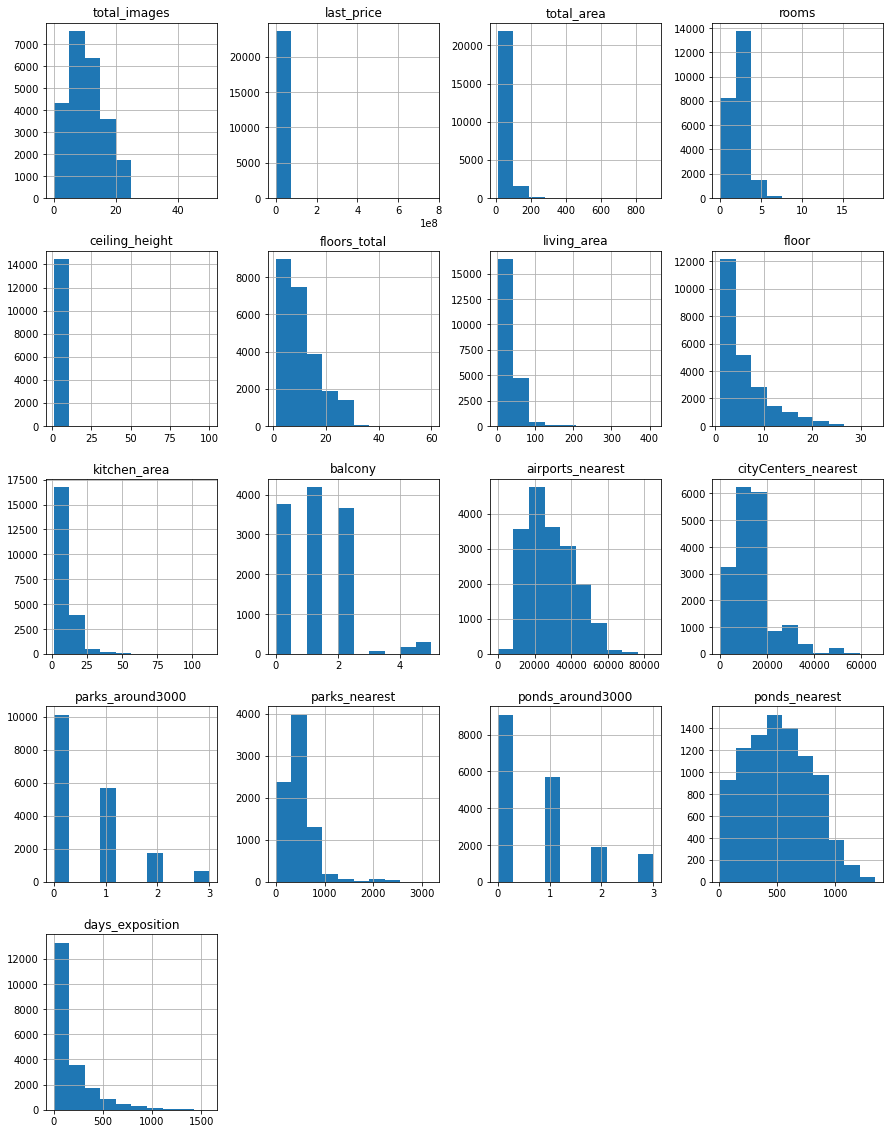

In [5]:
# построим общую гистограмму для всех столбцов таблицы
data.hist(figsize=(15, 20))

**'last_price'** имеет слишком большой разброс значений, поэтому под графиков написано `1e8`(1e8 ~ 10^8) и выведен лишь 1 столбец. Проще говоря, эта гистограмма имеет слишком маленький масштаб и слишком большой диапозон чисел, чтобы хоть что-то разглядеть. Такая же ситация с **'ceiling_height'**. Для проверки корректности значений ниже построены графики.

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

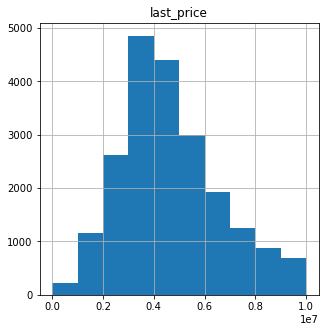

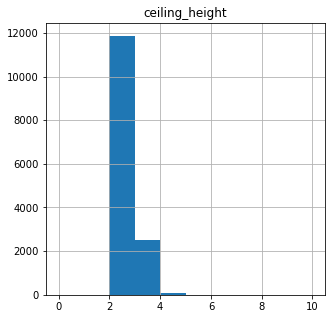

In [6]:
# построим гистограммы на основе 'last_price' и 'total_area', чтобы убелится, что данные корректны.
data.hist('last_price', range=(0, 10000000), figsize=(5, 5))
data.hist('ceiling_height', range=(0, 10), figsize=(5, 5))

<div style="border:solid green 2px; padding: 20px">
    
        Итак, после просмотра данных, стало понятно какие существуют данные, какие они 
    имеют диапозоны и какие форматы имеют данные. Также выявилось, что существуют 
    пропуски, аномальные значения и неправильные форматы данных. Теперь можно приступать
    к обработке этих данных. 
</div>

### Предобработка данных

Я буду ориентироваться на [Таблицу данных](#Таблица-данных). 

In [7]:
# переведём cityCenters_nearest к змеиному регистру
data = data.rename(columns={'cityCenters_nearest': 'city_сenters_nearest'})

In [8]:
# для удобсва представим столбец стоимости в миллионах
data['last_price_million'] = data['last_price'] / 1000000

Теперь все колонки приведены к единому регистру и цена представлена в удобном для анализа виде. Можно начинать предобработку.

#### Обработка пропусков и типов данных

Пропуски могут возникнуть по разным причинам, однако их нужно изучить и по возможности избавиться, потому что без этого результат может выйти некорректным. 

In [9]:
# определим, в каких столбцах есть пропуски и сколько их
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
last_price_million          0
dtype: int64

**Итак, как же бороться с пропусками?**

1. До начала разберёмся со столбцами с маленьким количеством пропусков: избавимся от них. Это можно сделать, так как относительно большого массива данных они не являются показательными.

2. Пропуски в некоторых столбцах могли получиться из-за того, что продавец мог посчитать их заполнение необязательным, если такое условие не выполняется. Так пользователь мог не заполнить поле с количеством балконов, если их нет (заменим пропуски нулями) и пропустить пункт об апартоменты, если продаёт не их (заменим на False). По такому же принципу заполним количество прудов и парков рядом с домами.

3. Высоту потолков можно заменить медианным значением (почему медианными? Среднее арифметическое наверняка очень искажено из-за экстремумов, поэтому медиана лучше будет отражать действительность).

4. Площадь кухни и жил.площадь продавец мог не измерять, однако её тоже можно заполнить. Для этого:

  + посчитаем сколько в среднем занимает жил.площадь/кухня от средней площади квартиры (то есть найти отношение медианных значений); 
  + далее  просто умножаем полученные коэфициенты на площадь квартиры. 

(*Понимаю, что с помощью коэфициента я упрощаю себе жизнь, так как это могут быть евро-квартиры, площадь кухонь может зависеть от количества комнат и так далее. Если нужно это учитывать, то на доработке это сделаю.*)

5. Пропуски в 'days_exposition' могли появиться по разным причинам, например, из-за того, что на тот момент квартиру ещё не продали. Стоит проверить эту гипотезу. Проверка осуществляется [здесь](#Проверка-зависимости-продаж-от-года)

6. После дальнейшей обработки неявных дубликатов, проверим, можно ли заполнить столбец с расстоянием до центра города медианами. Если нет, то в дальнейшем используем особый маркер для заполнения информации. Проверка осуществляется в [этом разделе](#Проверка-расстояния-до-центра)

7. Остальные параметры зависят от конкретной квартиры и поэтому заполнить их сложно.


In [10]:
# удаляем строки, где количество пропусков небольшое:
data = data.dropna(subset=['locality_name', 'floors_total'])

# заполним пропуски в столбце нулями 
data['balcony'] = data['balcony'].fillna(value=0)
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)


# заполним пропуски в столбце значениями False
data['is_apartment'] = data['is_apartment'].fillna(value=False)

# заполнить пропуски в столбце медианными значениями
data['ceiling_height'] = data['ceiling_height'].fillna(value=data['ceiling_height'].median())

# заполним пропуски в столбцах с помощью отношения медиан
living_conv = data['living_area'].median() / data['total_area'].median()
kitchen_conv = data['kitchen_area'].median() / data['total_area'].median()
data['living_area'].fillna(living_conv * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_conv * data['total_area'], inplace=True)

In [11]:
data['ceiling_height'] = data['ceiling_height']

#### Обработка типов данных

**Также не стоит забывать про типы данных:**
1. Сложно представить в квартире 2 с половиной балкона или дом с 14 с четвертью этажами, поэтому преобразуем ряд столбцов в формат целых чисел.
2. Преобразуем столбец 'first_day_exposition' в формат дат.

In [12]:
# изменим тип данных у некоторых столбцов на целочисленные значения
int_types_columns = ['balcony', 'floors_total', 'parks_around3000', 'ponds_around3000', 'last_price']
for column in int_types_columns:
    data[column] = data[column].astype(int)

# преобразуем столбец в корректный формат даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

#### Проверка зависимости продаж от года

In [13]:
# заранее создадим столбец с годами
data['year'] = data['first_day_exposition'].dt.year

# создадим список с количеством пропусков по годам
nan_year = []
for year in sorted(data['year'].unique()):
    nan_year.append(data[data['year'] == year]['days_exposition'].isna().sum())
    
# создадим таблицу по годам с пропусками
data_year = data.pivot_table(index='year', values = 'first_day_exposition', aggfunc='count')
data_year['is_na'] = nan_year
data_year['per'] = data_year['is_na'] / data_year['first_day_exposition'] * 100
data_year.columns = ['количество значений', 'количество пропусков', 'процент пропусков']
data_year

,количество значений,количество пропусков,процент пропусков
year,,,
2014,136,18,13.235294
2015,1166,70,6.003431
2016,2745,67,2.440801
2017,8161,271,3.320671
2018,8486,957,11.277398
2019,2871,1788,62.277952


Как и предполагалось, в 2018 и 2019 процент пропусков выше, чем годами ранее. Значит, недвижимость в эти года ещё не куплена. Пропуски в 2014 году могли появиться из-за несовершенства сервиса или из-за того, что в те годы продажа онлайн только начинала проявляться. (Эти преположения могут быть подкреплены маленьким количеством размещений объявлений).

#### Обработка дубликатов

Дубликаты могут усложить работу или даже исказить данные, поэтому от них стоит избавиться.

In [14]:
# посмотрим есть ли явные дубликаты в данных
data.duplicated().sum()

0

Явных дубликатов не обнаружено, однако надо проверить наличие неявных.

In [15]:
# выведем на экран уникальные значения столбца, чтобы выявить дубликаты:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

На первый взгляд, в данных часто встречаются чередования `"посёлок" - "поселок"`. Стоит от них избавиться. Однако, это не всё: также присутствуют дубликаты `"городской поселок" - "поселок городского типа"` и `"поселок при железнодорожной станции" - "поселок станции"`. От них также необходимо избавиться

In [16]:
# избавимся от неявных дубликатов методом replase()
data['locality_name'] = data['locality_name'].str.replace("посёлок", "поселок") 
data['locality_name'] = data['locality_name'].str.replace("городской поселок", "поселок городского типа")
data['locality_name'] = data['locality_name'].str.replace("поселок при железнодорожной станции", "поселок станции") 

#### Проверка расстояния до центра

Отдельно теперь проверим, можно ли заполнить расстояние до центра медианами в зависимости от уникальных населённых пунктов:

In [17]:
# построим таблицу с населёнными пунктами, где указано хотя бы 1 расстояние.
pivot_median_center = data.pivot_table(index='locality_name', values='city_сenters_nearest', aggfunc='median')
pivot_median_center

,city_сenters_nearest
locality_name,
Зеленогорск,53381.0
Колпино,32018.0
Красное Село,29148.5
Кронштадт,49575.0
Ломоносов,51677.0
Павловск,32683.0
Петергоф,33771.0
Пушкин,27930.5
Санкт-Петербург,12242.0


В таблице не так уж и много столбцов. Стоит посмотреть сколько населённых пунктов с указанными и пропущенными значениями:

In [18]:
print('Количество населённых пунктов без указания расстояния до центра города:', len(data['locality_name'].unique()) - pivot_median_center.shape[0])
print('Количество населённых пунктов, где указано расстояние до центра города:', pivot_median_center.shape[0])

Количество населённых пунктов без указания расстояния до центра города: 296
Количество населённых пунктов, где указано расстояние до центра города: 25


Населённых пунктов без указания хотя бы одного расстояния до центра очень много, поэтому в дальнейшем я буду использовать маркер.

*(Я понимаю, что такие значения можно исключить вообще: 18К уже являются статистикой. Однако 5-6К значений составляют приблизительно 25% от выборки, поэтому это может повлять на исследование и выводы.)*

#### Устранение аномалий

Остались только аномальные значения. 

По первым гистограмам и методу describe было видно, что в некоторых столбцах есть аномальные значения. Они могли появиться из-за невнимательности продавца, неправильный выгрузки данных, сбоев в сайте и так далее. Эти значения могут исказить данные, поэтому стоит их обработать.

Рассмотрим столбцы:
+ rooms;
+ ceiling_height;
+ last_price и last_price_million;
+ living_area.

---

Начнём с количества комнат. Для обработки этого столца нужно рассмотреть два пункта:
1. Почему появились квартиры с 0 комнатами? Нужно проверить студии ли это.
2. Какое большое количество комнат можно не учитывать, так как оно не повлияет на статистику, а наоборот может испортить анализ в дальнейшем.

In [19]:
# сгруппируем данные по комнатам и выведем их количество
data.groupby('rooms')['rooms'].count()

rooms
0      194
1     8004
2     7897
3     5779
4     1172
5      325
6      104
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

Количество квартир комнат от 11 до 19 незначительное, поэтому такие значения лучше исключить.

In [20]:
data = data.loc[data['rooms'] < 11]

In [21]:
# посмотрим почему появились такие значения. Возможно, так обозначаются студии.
data[(data['studio'] == True) & (data['rooms'] == 0)]['rooms'].count()

135

Количества разнятся, однако не значительно.

Человеческий фактор играет важную роль при заполнении данных. Человек мог либо забыть написать количество комнат, либо не написать, что это студия. Расчитать, что именно сделал человек неправильно сложно, однако аномалии оставлять нежелательно. 

Изменим значения в столбце studio на True, если количество комнат равно 0.

In [22]:
data.loc[(data['rooms'] == 0) & (data['studio']==False), 'studio'] = True

---

Теперь рассмотрим высоту потолков. 

В данных есть потолки выше 20 метров. Возможно, это двухэтажные квартиры (однако в Спб таких наверняка мало). Для исследования и проверки значений стоит выполнить следующие шаги:

+ рассмотрим какие есть аномальные значения (ниже 2 и выше 4 метров), найдём их количество и проверим взаимосвязь между высотой потолков, площадью квартиры и ценой на неё;
+ проверим эти значения на наличие опечаток и если они есть, то исправим;
+ рассмотрим оставшиеся аномальные данные с точки зрения показательности (если их много, то стоит рассмотреть их адекватность, если их немного, тогда можно их исключить).

In [23]:
# До начала посчитаем сколько всего аномалий
data[(data['ceiling_height'] > 4) | (data['ceiling_height'] < 2)]['ceiling_height'].count()


78

In [24]:
# построим таблицу, описанную ранее
data_ceil_pivot = data[(data['ceiling_height'] > 4) | (data['ceiling_height'] < 2)].pivot_table(index='ceiling_height', values=['last_price_million', 'total_area'], aggfunc='median')
data_ceil_pivot['count'] = data[(data['ceiling_height'] > 4) | (data['ceiling_height'] < 2)].groupby('ceiling_height')['ceiling_height'].count()
data_ceil_pivot.columns = 'цена, млн', 'площадь квартиры, м^2', 'количество'
data_ceil_pivot

,"цена, млн","площадь квартиры, м^2",количество
ceiling_height,,,
1.00,6.0000,55.00,1
1.20,1.5000,42.80,1
1.75,4.1000,40.00,1
4.06,6.6950,36.90,1
4.10,9.9980,65.60,3
4.14,15.0000,117.30,1
4.15,8.2000,80.00,1
4.19,4.6500,47.85,2
4.20,13.7450,105.50,10


Цены у потолков в диапозоне от 20 до 40 м похожи на цены обычных квартир, вероятнее всего, это опечатка, которую нужно исправить. 

Цены на квартиры с высокими потолками не везде адекватные, да и площадь очень странно распределена. Стоит посмотреть их общее количество после исправления опечаток и исключить это не повляет на статистику.

In [25]:
# перенесём запятую
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if 20 <= x <= 40 else x)

# посчитаем количество оставшихся аномалий и сравним количество с адеватными
print('Количество аномалий:', data[(data['ceiling_height'] > 4) | (data['ceiling_height'] < 2)].shape[0])
print('Количество адеватных значений:', data[(data['ceiling_height'] <= 4) & (data['ceiling_height'] >= 2)].shape[0])


Количество аномалий: 56
Количество адеватных значений: 23501


Аномалий незначительное количество относительно остального объёма данных, поэтому просто исключим эти значения из Датафрейма.

In [26]:
# теперь уберём все квартиры, где значение потолков меньше 2 или больше 4 метров
data = data.loc[(data['ceiling_height'] <= 4) & (data['ceiling_height'] >= 2)]

---

Очень сложно жить в квартире с жилой площадью меньше 10 квадратных метров. Посмотрим, насколько такие значения могут повлиять на статистику.

In [27]:
# посчитаем количество
data[data['living_area'] < 10].shape[0]

31

Их немного, поэтому их стоит исключить.

In [28]:
data = data.loc[data['living_area'] >= 10]

---

Теперь разберёмся с ценами. Нельзя исключать, что кто-то продавал квартиру за 800 млн, однако такие значения не являются статистикой, если их мало. Также по изначальному графику было видно, что больше 100 млн значений почти нет. Также странно, что есть скопление данных около нуля. Проверим это.

In [29]:
# посчитаем количество
data[data['last_price_million'] > 100].shape[0]

32

Значений и правда мало, поэтому их лучше исключить

In [30]:
data = data.loc[data['last_price_million'] <= 100]

Теперь рассмотрим слишком маленькие цены. Для этого обратимся к изначальным ценам, а не к миллионам. До начала определим, в каком диапозоне лучше смотреть

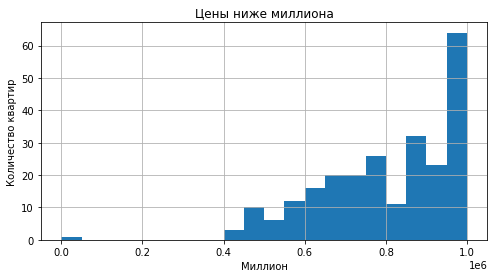

In [31]:
data['last_price'].hist(range=(0,1000000), figsize=(8,4), bins=20)
plt.title('Цены ниже миллиона')
plt.xlabel('Миллион')
plt.ylabel('Количество квартир')
plt.show()

Значений меньше 700К на первый взгляд немного. Проверим это.

In [32]:
data[data['last_price'] < 700000].shape[0]

68

Их действительно немного, поэтому исключим их.

In [33]:
data = data.loc[data['last_price'] >= 700000]

---

Теперь посчитаем какой ущерб мы принесли данным.

In [34]:
print('Всего удалено', (23699 - data.shape[0]) , 'значений.')

Всего удалено 329 значений.


<div style="border:solid green 2px; padding: 20px">
    
        В результате обработки данных было сделано следующее:
    1. Обработаны пропуски.
    2. Изменены типы данных в некоторых столбцах.
    3. Удалены дубликаты.
    4. Удалены аномальные изначения.
    По итогу было удалено 329 значения.
    Теперь можно изменять таблицу для дальнейшего анализа.
    
</div>

### Посчитайте и добавьте в таблицу новые столбцы

Для удобства анализа состадим нескольно ковых столбцов:

In [35]:
# цена одного квадратного метра
data['m_sq_price'] = data['last_price'] / data['total_area']

# день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
data['weekday'] = data['first_day_exposition'].dt.weekday

# месяц публикации объявления;
data['month'] = data['first_day_exposition'].dt.month

# год публикации объявления был добавлен ранее

# тип этажа квартиры (значения — «первый», «последний», «другой»);
def floor_group(flat):
    if flat['floor'] == 1:
        return 'первый'
    elif flat['floor'] == flat['floors_total']:
        return 'последний'
    return 'другой'

data['floor_type'] = data.apply(floor_group, axis=1)

#расстояние до центра города в километрах.
data['city_сenters_nearest_km'] = data['city_сenters_nearest'] / 1000
#в расстояниях присутствуют пропуски, здесь их можно заполнить особыми осозначениями (9999)
data['city_сenters_nearest_km'] = data['city_сenters_nearest_km'].fillna(9999).astype(int) 

<div style="border:solid green 2px; padding: 20px">
    
        Теперь у нас есть всё необходимое для начала анализа.
    
</div>

### Проведите исследовательский анализ данных

#### Изучение параметров

До начала построим все необходимые графики и вызовем метод описания данных. Это позволит сложить подробное впечатление о следующих параметрах:

+ общая площадь;
+ жилая площадь;
+ площадь кухни;
+ цена объекта;
+ количество комнат;
+ высота потолков;
+ этаж квартиры;
+ тип этажа квартиры («первый», «последний», «другой»);
+ общее количество этажей в доме;
+ расстояние до центра города в метрах;
+ расстояние до ближайшего аэропорта;
+ расстояние до ближайшего парка;
+ день и месяц публикации объявления.

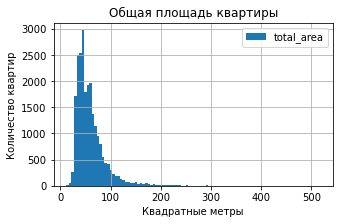

count    23370.000000
mean        59.771460
std         32.530725
min         12.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        517.000000
Name: total_area, dtype: float64

In [36]:
# рассмотрим общую площадь
# нарисуем гистограмму
data.plot(y = 'total_area', kind = 'hist', grid=True, bins=100, figsize = (5,3))
plt.title('Общая площадь квартиры')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
# вызовем метод describe()
data['total_area'].describe()

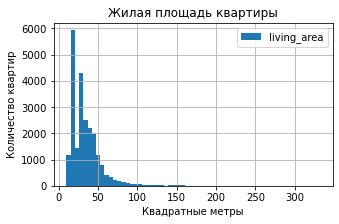

count    23370.000000
mean        34.308546
std         20.720351
min         10.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        332.000000
Name: living_area, dtype: float64

In [37]:
# нарисуем гистограмму
data.plot(y = 'living_area', kind = 'hist', bins=60, grid=True, figsize = (5,3))
plt.title('Жилая площадь квартиры')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
# вызовем метод describe()
data['living_area'].describe()

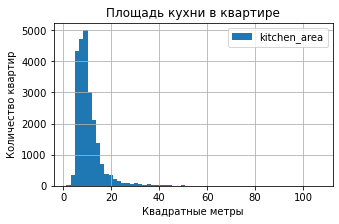

count    23370.000000
mean        10.432086
std          5.767628
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

In [38]:
# нарисуем гистограмму
data.plot(y = 'kitchen_area', kind = 'hist', bins=60, grid=True, figsize = (5,3))
plt.title('Площадь кухни в квартире')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
# вызовем метод describe()
data['kitchen_area'].describe()

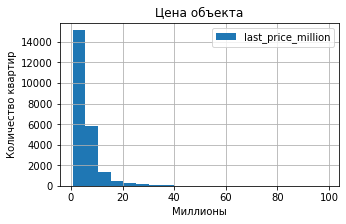

count    23370.000000
mean         6.227400
std          6.288156
min          0.700000
25%          3.439400
50%          4.645000
75%          6.750000
max         99.000000
Name: last_price_million, dtype: float64

In [39]:
# нарисуем гистограмму
data.plot(y = 'last_price_million', kind = 'hist', bins=20, grid=True, figsize = (5,3))
plt.title('Цена объекта')
plt.xlabel('Миллионы')
plt.ylabel('Количество квартир')
plt.show()
# вызовем метод describe()
data['last_price_million'].describe()

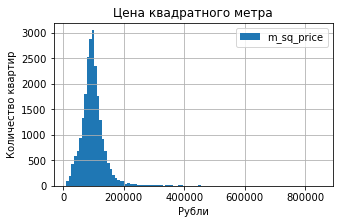

count     23370.000000
mean      98623.770298
std       42535.183587
min       10507.246377
25%       76673.849869
50%       94972.067039
75%      114000.000000
max      848484.848485
Name: m_sq_price, dtype: float64

In [40]:
# нарисуем гистограмму
data.plot(y = 'm_sq_price', kind = 'hist', bins=100, grid=True, figsize = (5,3))
plt.title('Цена квадратного метра')
plt.xlabel('Рубли')
plt.ylabel('Количество квартир')
plt.show()
# вызовем метод describe()
data['m_sq_price'].describe()

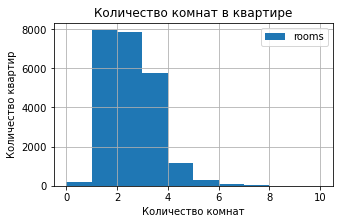

count    23370.000000
mean         2.063243
std          1.046207
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: rooms, dtype: float64

In [41]:
# нарисуем гистограмму
data.plot(y = 'rooms', kind = 'hist', grid=True, figsize = (5,3))
plt.title('Количество комнат в квартире')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
# вызовем метод describe()
data['rooms'].describe()

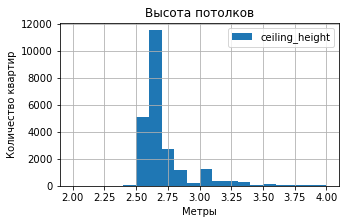

count    23370.000000
mean         2.692630
std          0.203663
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

In [42]:
# нарисуем гистограмму
data.plot(y = 'ceiling_height', kind = 'hist', bins=20, grid=True, figsize = (5,3))
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
# вызовем метод describe()
data['ceiling_height'].describe()

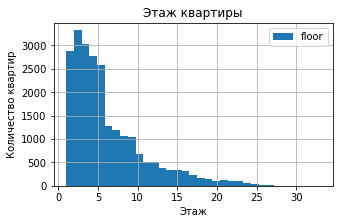

count    23370.000000
mean         5.889474
std          4.873914
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [43]:
# нарисуем гистограмму
data.plot(y = 'floor', kind = 'hist', grid=True, bins=33, figsize = (5,3))
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()
# вызовем метод describe()
data['floor'].describe()

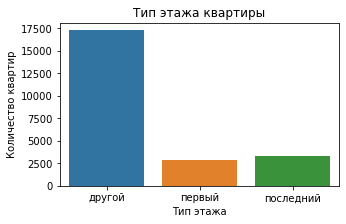

Квартир на последнем этаже: 3267
Квартир на первом этаже: 2873


In [44]:
# импортируем библиотеку warnings, чтобы Питон не выдавал ошибку при построении графика
import warnings
warnings.filterwarnings("ignore")

# и всё-таки сибонка пригодилась!
# нарисуем количественный график
plt.figure(figsize=(5,3))
sns.countplot(data['floor_type'])
plt.title('Тип этажа квартиры')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.show()
# посмотрим количество квартир на первом и последнем этаже
print('Квартир на последнем этаже:', data[data['floor_type'] == 'последний']['floor'].count())
print('Квартир на первом этаже:', data[data['floor_type'] == 'первый']['floor'].count())

#pd.pivot_table(data, index='floor_type',values='debt', aggfunc=(lambda x: x.sum()/x.count() * 100))

Конечно, график немного выбивает из стиля, зато выглядит информативно

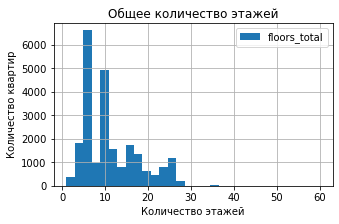

count    23370.000000
mean        10.708258
std          6.592317
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [45]:
# нарисуем гистограмму
data.plot(y = 'floors_total', kind = 'hist', grid=True, bins=30, figsize = (5,3))
plt.title('Общее количество этажей')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()
# вызовем метод describe()
data['floors_total'].describe()

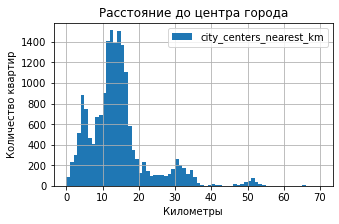

count    17945.000000
mean     14237.685539
std       8608.987308
min        181.000000
25%       9319.000000
50%      13127.000000
75%      16296.000000
max      65968.000000
Name: city_сenters_nearest, dtype: float64

In [46]:
# нарисуем гистограмму
data.plot(y = 'city_сenters_nearest_km', kind = 'hist', bins=70, grid=True, figsize = (5,3), range=(0,70))
plt.title('Расстояние до центра города')
plt.xlabel('Километры')
plt.ylabel('Количество квартир')
plt.show()
# вызовем метод describe() для метров, чтобы увидеть объективные цифры
data['city_сenters_nearest'].describe()

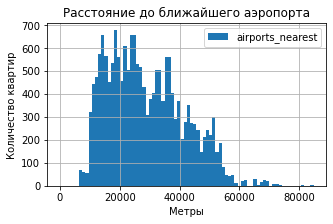

count    17925.000000
mean     28808.342762
std      12657.642371
min          0.000000
25%      18539.000000
50%      26770.000000
75%      37313.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [47]:
# нарисуем гистограмму
data.plot(y = 'airports_nearest', kind = 'hist', grid=True, bins=80, figsize = (5,3))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
# вызовем метод describe()
data['airports_nearest'].describe()

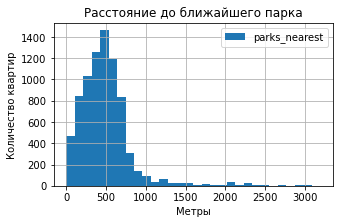

count    7955.000000
mean      490.814331
std       341.964728
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [48]:
# нарисуем гистограмму
data.plot(y = 'parks_nearest', kind = 'hist', grid=True, bins=30, figsize = (5,3))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
# вызовем метод describe()
data['parks_nearest'].describe()

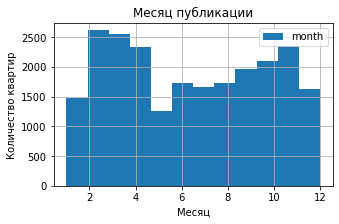

count    23370.000000
mean         6.403894
std          3.492573
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

In [49]:
# нарисуем гистограмму
data.plot(y = 'month', kind = 'hist', bins=12, grid=True, figsize = (5,3))
plt.title('Месяц публикации')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()
# вызовем метод describe()
data['month'].describe()

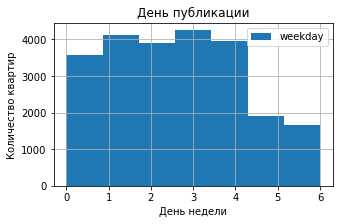

count    23370.000000
mean         2.566324
std          1.787884
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

In [50]:
# нарисуем гистограмму
data.plot(y = 'weekday', kind = 'hist', bins=7, grid=True, figsize = (5,3))
plt.title('День публикации')
plt.xlabel('День недели')
plt.ylabel('Количество квартир')
plt.show()
# вызовем метод describe()
data['weekday'].describe()

<div style="border:solid green 2px; padding: 20px">
    <p>
    <b>Текстовое описание данных: </b>
    <ol>
        <li>Квартир с общей площадью больше 200 м² не много. Чаще всего продаются квартиры от 30 до 100 м². Медианное значение 52 м² достаточно близко к среднему 59,7 м². Квартир с жил.площадью больше 100 м² не много. Больше всего продаж квартир с жил.площадью от 10 до 40 м². Медианное значение 30 м² также близко к среднему 34,3 м². Кухонь больше 40 м² мало. Чаще всего встречаются квартиры с площадью кухни от 5 до 12 м². Медианное 9 м² близко к среднему 10,4 м².
        <li>Квартир, которые стоят больше 20 млн немного. Чаще всего продают квартиры за 3-6 млн. Медианное значение 4,6 млн. Среднее 6,2 млн. Чаще всего квадратный метр стоит от 70К до 120К и больше всего квартир с ценой квадратного метра примерно 100К.
        <li>Как мы до этого выясними, квартиры с 0 комнатами это студии. Их относительно немного. Как и ожидалось, чаще всего на рынке встречаются квартиры с 1-5 комнатами. Квартир с количеством комнат больше 6 достаточно мало. Чаще всего продаются двушки.
        <li>Реже всего встречаются потолки ниже 2,75 метров и выше 3,5 метров. Больше всего квартир с потолками в 2,6-2,7 м в высоту. Медианное значение приблизительно равно среднему и составляет 2,65 метра. Таких потолков больше всего.
        <li>Чаще всего продаются квартира на 3-5 этажах, квартир на 20 этаже и выше мало. Соотношение первых и последних этажей примерно одинаковое (на первом 2873 квартиры, на последнем 3267). Больше всего квартир продаются в домах, где до 10 этажей, домов больше 30 этажей очень мало. В среднем дома имеют 11 этажей, медиана же составляет 9 этажей.
        <li>Большая часть квартир находится в радиусе 9-20 км от центра города. Меньше всего квартир дальше 40 км от центра. Расстояние до аэропорта в среднем составляет 18-40 км, до парка 300-600 метров.     
        <li>В январе, декабре и в мае меньше всего размещений объвлений. И при этом чаще всего квартиры продаются весной. На выходных меньше всего выкладывают объявления.


#### Изучаем, как быстро продавались квартиры

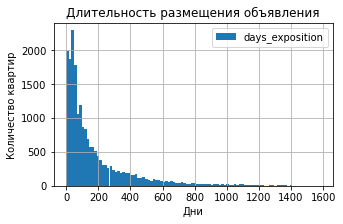

count    20224.000000
mean       180.266021
std        219.222822
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [51]:
# нарисуем гистограмму
data.plot(y = 'days_exposition', kind = 'hist', bins=100, grid=True, figsize = (5,3))
plt.title('Длительность размещения объявления')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
# вызовем метод describe()
data['days_exposition'].describe()

<div style="border:solid green 2px; padding: 20px">
    
        В большинстве случаев квартиры продаются в срок до 100 дней, но есть и исключения, которые сильно искажают среднее арифметическое. 
    МЕДИАНА: 95 дней
    СРЕДНЕЕ АРИФМЕТИЧЕСКОЕ: 180 дней
    БЫСТРЫЕ ПРОДАЖИ: от 1 до 45 дней
    ОЧЕНЬ ДОЛГИЕ ПРОДАЖИ: больше 800 дней
    
</div>

#### Факторы, влияющие на стоимость

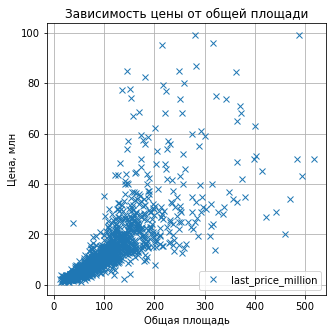

Корреляция цены и общей площади: 0.7610652129779449


In [52]:
# Зависимость цены от общей площади

# построим график
data.pivot_table(index='total_area', values='last_price_million').plot(grid=True, style='x', figsize=(5, 5))
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Цена, млн')
plt.show()
# посчитаем корреляцию
print('Корреляция цены и общей площади:', data['total_area'].corr(data['last_price']))

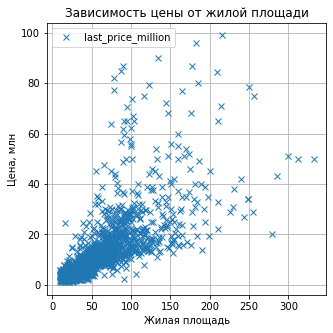

Корреляция цены и жилой площади: 0.6810567593740532


In [53]:
# Зависимость цены от жилой площади

# построим график
data.pivot_table(index='living_area', values='last_price_million').plot(grid=True, style='x', figsize=(5, 5))
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена, млн')
plt.show()
# посчитаем корреляцию
print('Корреляция цены и жилой площади:', data['living_area'].corr(data['last_price']))

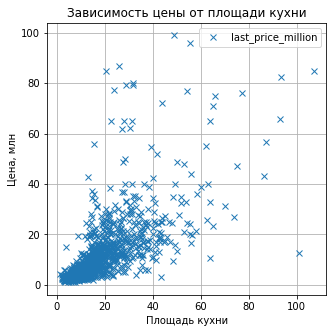

Корреляция цены и площади кухни: 0.6128798288285356


In [54]:
# Зависимость цены от площадии кухни

# построим график
data.pivot_table(index='kitchen_area', values='last_price_million').plot(grid=True, style='x', figsize=(5, 5))
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена, млн')
plt.show()
# посчитаем корреляцию
print('Корреляция цены и площади кухни:', data['kitchen_area'].corr(data['last_price']))

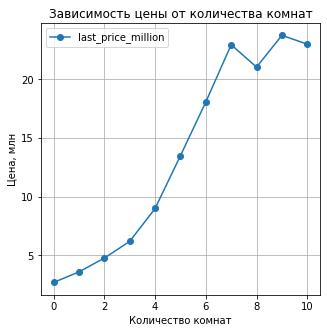

Корреляция цены и количества комнат: 0.466683901092524


In [55]:
# Зависимость цены от количества комнат

# построим график
data.pivot_table(index='rooms', values='last_price_million', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена, млн')
plt.show()
# посчитаем корреляцию
print('Корреляция цены и количества комнат:', data['rooms'].corr(data['last_price']))

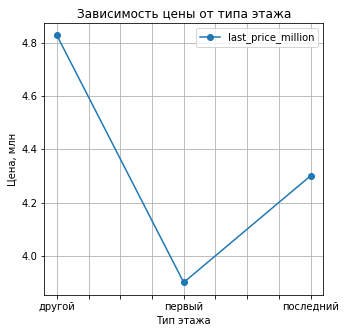

In [56]:
# Зависимость цены от типа этажа

# построим график
data.pivot_table(index='floor_type', values='last_price_million', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость цены от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена, млн')
plt.show()
# корреляцию здесь вычислить сложно

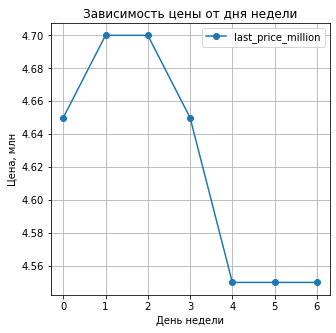

Корреляция цены и дня недели: -0.0029049094129611004


In [57]:
# Зависимость цены от дня недели

# построим график
data.pivot_table(index='weekday', values='last_price_million', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость цены от дня недели')
plt.xlabel('День недели')
plt.ylabel('Цена, млн')
plt.show()
# посчитаем корреляцию
print('Корреляция цены и дня недели:', data['weekday'].corr(data['last_price']))

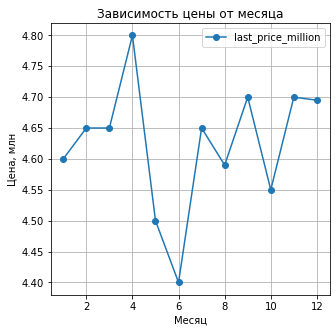

Корреляция цены и месяца: 0.006131882974117994


In [58]:
# Зависимость цены от месяца

# построим график
data.pivot_table(index='month', values='last_price_million', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость цены от месяца')
plt.xlabel('Месяц')
plt.ylabel('Цена, млн')
plt.show()
# посчитаем корреляцию
print('Корреляция цены и месяца:', data['month'].corr(data['last_price']))

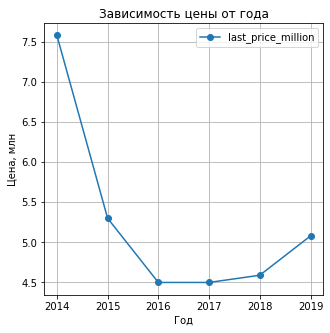

Корреляция цены и года: -0.047713661164048286


In [59]:
# Зависимость цены от года

# построим график
data.pivot_table(index='year', values='last_price_million', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость цены от года')
plt.xlabel('Год')
plt.ylabel('Цена, млн')
plt.show()
# посчитаем корреляцию
print('Корреляция цены и года:', data['year'].corr(data['last_price']))

<div style="border:solid green 2px; padding: 20px">
    <p>
        <ol>
            <li>
                Самая большая зависимость между ценой и общей площадью квартиры. Однако, цена 
    также напрямую зависит от площади кухни и жилой площади. Чем больше площади, тем выше 
    цена. (Сильная положительная корреляция).
            </li>
            <li>
                Также цена зависит от количества комнат. Чем больше комнат, чем выше цена. Больше 
    всего это заметно по возвышающемуся графику с 0 до 7 комнатами.
            </li>
            <li>
                Цена на 1 этаже ниже всего. На последнем этаже цена ниже, чем на других этажах.
            </li>
            <li>
                Меньше всего цена зависит от дня и месяца публикации.
            </li>
            <li>
        Меньше всего цена зависит от дня недели и месяца публикации. Однако можно заметить некую зависимость по годам: 
            </li>
            </ol>
    <ul>
        <li>предположительно, развитость и популярность сервиса была низкой. Объявления с низкими ценами и из разных населённых пунктов Лен.области выкладывались не в таком большом количестве,
        </li>
        <li>с 2017 по 2019 год цены на недвижимость в Лен.области выросли (ссылка на одно исследование ниже).
        </li>
    </ul>
    </p>
        
</div>

[ссылка на на динамику стоимости недвижимости по годам](https://www.realtymag.ru/leningradskaya-oblast/kvartira/prodazha/prices/all-time)


*(Конечно, одна ссылка это не объективно, но это просто одно из подтверждений).*

#### Посчитаем среднюю цену квадратного метра

In [60]:
# выведем города с наибольшим количеством объявлений и найдём среди них
# населёнными пункты с наибольшей средней ценой на квадратный метр

data_loc_price = data.pivot_table(index='locality_name', values='m_sq_price', aggfunc=['count', 'mean'])
data_loc_price.columns = ['count', 'mean']
data_loc_price.sort_values(by='count', ascending=False)[:10].sort_values(by='mean', ascending=False)


,count,mean
locality_name,,
Санкт-Петербург,15535,113432.357703
Пушкин,368,103058.361434
деревня Кудрово,299,92473.547576
поселок Парголово,327,90175.913458
поселок Мурино,551,85601.120803
поселок Шушары,438,78577.014984
Колпино,338,75424.579098
Гатчина,307,68746.146763
Всеволожск,397,68605.572959


<div style="border:solid green 2px; padding: 20px">
    <p>
        Наибольшее количество объявлений и наибольшая цена за квадратный метр в <b>Санкт-Петербурге</b>.
    </p>
    <p>
        Наименьшая цена и наименьшее количество объявлений в <b>Выборге</b>.
    </p>
    
</div>

 #### Анализ отдалённости от центра в Спб

In [66]:
# создадим отдельную таблицу с квартирами в Спб
spb_data = data[data['locality_name'] == 'Санкт-Петербург']

# посчитаем сколько пропусков было допущено ранее
spb_data[spb_data['city_сenters_nearest_km'] == 9999].shape[0]
# ранее 9999 обозначал пропуск значения. В этой таблице лучше не учитывать такие строки, так как 
# это может появлять на итоговый результат. Также таких значений немного относительно остального
# массива данных.

59

In [67]:
# исключим маркеры
spb_data = spb_data.loc[spb_data['city_сenters_nearest_km'] != 9999]

In [68]:
# выведем на экран таблицу с распределением цен в зависимости от удалённости от центра
spb_data.pivot_table(index='city_сenters_nearest_km', values=['last_price_million'], aggfunc='mean')

,last_price_million
city_сenters_nearest_km,
0,20.415111
1,14.947722
2,13.649661
3,11.137316
4,12.665638
5,13.081725
6,13.129933
7,10.900928
8,8.420222


In [69]:
# посчитаем корреляцию
spb_data['last_price_million'].corr(spb_data['city_сenters_nearest_km'])

-0.372601113026592

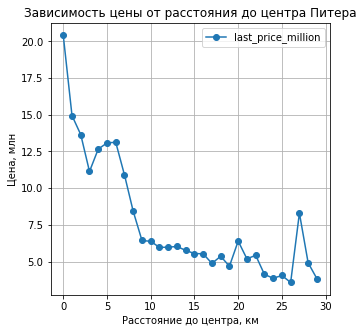

In [70]:
# построим график
spb_data.pivot_table(index='city_сenters_nearest_km', values=['last_price_million'], aggfunc='mean').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость цены от расстояния до центра Питера')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Цена, млн')
plt.show()

<div style="border:solid green 2px; padding: 20px">
    
        Цены на квартиры в центре Питера в несколько раз выше цен на квартиры, находящиеся далеко от центра. Однако, даже далеко от центра есть дорогие квартиры, это стоит учитывать.
    
</div>

### Общий вывод

В ходе работы были сделаны следующие шаги:
1. Изучена общая информация и выдвинуты первые предложение по исправлению данных.
2. Была проведена предподготовка данных: удалены пропуски, изменены типы данных, удалены дубликаты и удалены аномальные значения.
3. В таблицу были внесены новые столбцы для дальнейшего облегчения анализа.
4. Проведён исследовательский анализ данных.

<div style="border:solid green 2px; padding: 20px">
    <p>
        <b>Найденные закономерности:</b>
        <li>больше всего цена на квартиру зависит от площади самой квартиры, при этом больших квартир (больше 200 м2) достаточно мало;</li>
        <li>квартиры на первом этаже стоят меньше всего, на последнем приблизительно равны другим квартирам, но всё-таки стоят меньше;</li>
        <li>наибольшая средняя цена на объект в Зеленогорске и Питере, а наименьшие в селах и деревнях: поселок Тёсово-4 и деревня Малая Романовка; </li>
        <li>обычно квартиры продаются не дольше 95 дней, но достаточно много квартир продавались пости срразу после публикации(до 45 дней). Квартир, которые продавались(больше 800 дней) долго значительно меньше;</li>
        <li>в последние года цена на недвижимость растёт;</li>
        <li>если рассматривать только Спб, то в его центре (в радиусе 7 км) самые дорогие квартиры, остальные же квартиры стоят в разу меньше. </li>
    </p>
            
    
</div>
